# MyND Offline Processing: Data Analysis
Author: Geeling Chau<br> 
Description: Process xdf files recorded from experimental sessions to determine file eligibility and data feature extraction.<br>
Sources: 
- Ollie's Segment Speller Offline Processing Code https://github.com/ollie-d/SegSpeller/blob/master/Offline%20Processing.ipynb 
- neurodsp https://github.com/neurodsp-tools/neurodsp
- FOOOF https://fooof-tools.github.io/fooof/index.html 


## Imports

In [1]:
from helperFunctions import *
from constants import *
from dataAnalysisFunctions import *

from neurodsp.plts.spectral import *

import warnings
warnings.filterwarnings('ignore')

## Data imports

In [2]:
filename_foldername_dict_path = "../data/most_currently_updated.pickle"
filename_foldername_dict = loadPickle(filename_foldername_dict_path)

foldername=filename_foldername_dict["foldername"]
filename=filename_foldername_dict["filename"]
print(foldername, filename)

dataframe_directory = "../data/dataframe/"+foldername+"/"
dataframe_path = dataframe_directory+filename+".pickle"

df = loadPickle(dataframe_path)

P001 part_P001_block_S004


In [3]:
incorporate_matlab_data = False
if incorporate_matlab_data: 
    filtered_matlab_data_directory = "../data/filtered_matlab_data/"+foldername+"/"
    filtered_matlab_data_path = filtered_matlab_data_directory+filename+".pickle"
    filtered_matlab_data = loadPickle(filtered_matlab_data_path)
    all_data = filtered_matlab_data
    data_type="data_matlab_extended"
else :
    filtered_cleaned_data_directory = "../data/filtered_cleaned_data/"+foldername+"/"
    filtered_cleaned_data_path = filtered_cleaned_data_directory+filename+".pickle"
    filtered_cleaned_data = loadPickle(filtered_cleaned_data_path)
    all_data = filtered_cleaned_data
    data_type="data_extended"

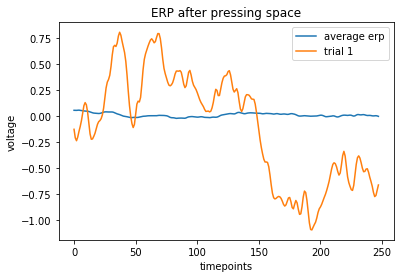

In [4]:
# ERP after space press
space_press_data, _, _ = getTimeBoundSingleLabelData("spacePressed", all_data, 0, 1)
eeg_list = tidyEEGList(getEEGFromDataList_AvgLeftRight(space_press_data))
plt.plot(np.mean(eeg_list, axis=0), label="average erp")
plt.plot(eeg_list[0], label="trial 1")


plt.title("ERP after pressing space")
plt.xlabel("timepoints")
plt.ylabel("voltage")
plt.legend()
plt.show()



In [5]:

data_type="data_matlab" if incorporate_matlab_data else "data"

In [9]:
numSections = getNumSections(filtered_cleaned_data)


num in list: 1 435
num in list: 2 495


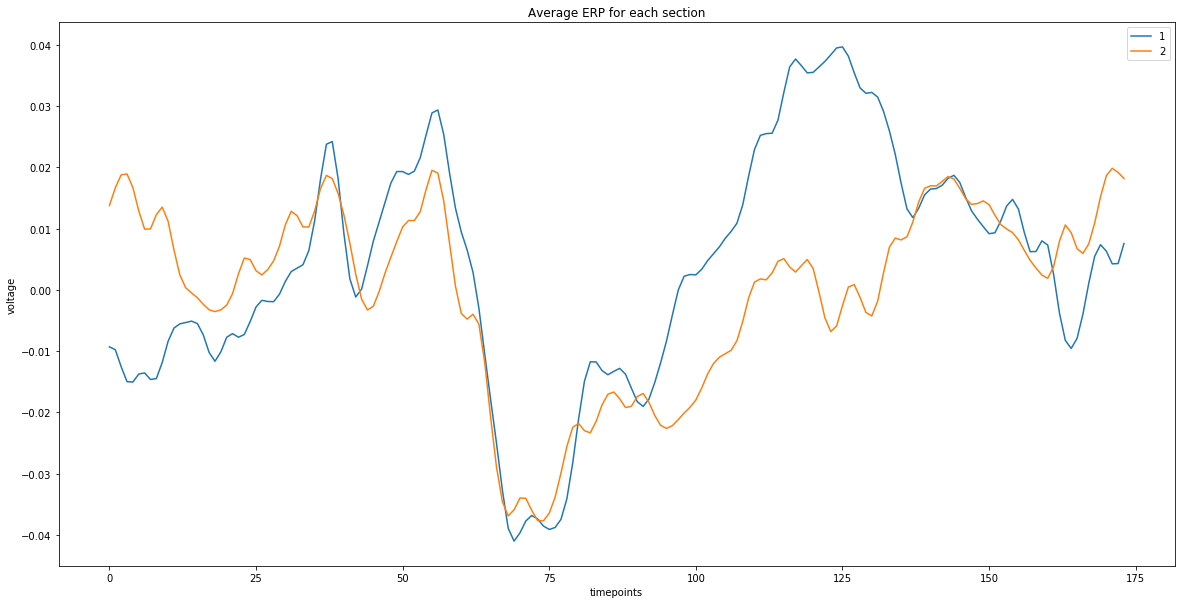

In [11]:
# Display average ERPs for each section
plt.figure(figsize=(20,10))


for i in range(1, numSections+1): 
    feature_name = "section_number"
    eeg_list = tidyEEGList(getEEGFromDataFrame_AvgLeftRight(df[df[feature_name]==i], data_type=data_type))
    print("num in list: " + str(i), len(eeg_list))
    plt.plot(np.mean(eeg_list, axis=0), label=i)

plt.title("Average ERP for each section")
plt.xlabel("timepoints")
plt.ylabel("voltage")
plt.legend()
plt.show()

In [12]:
df

,data_index,data,data_extended,is_target,is_pressed,has_letters_shown,has_meme,time,points,reaction_time,section_number,looking_up,looking_right,trial_time,word_length
0,0,"{'aux': {'time': [988.999909591776, 989.000117...","{'aux': {'time': [988.4972506704805, 988.49752...",True,False,False,False,988.995118,-1,0.000000,1,0,0,1.0,8
1,1,"{'aux': {'time': [990.0137349623215, 990.01392...","{'aux': {'time': [989.5172514059926, 989.51752...",True,True,False,False,990.011403,1,0.140599,1,0,0,1.0,6
2,2,"{'aux': {'time': [991.026037240875, 991.026244...","{'aux': {'time': [990.5233463885796, 990.52371...",False,False,False,False,991.022748,0,0.000000,1,0,0,1.0,3
3,3,"{'aux': {'time': [992.0462132503861, 992.05411...","{'aux': {'time': [991.5444450500859, 991.54470...",False,False,False,False,992.039946,0,0.000000,1,0,0,1.0,4
4,4,"{'aux': {'time': [993.0597070669332, 993.05994...","{'aux': {'time': [992.557575367635, 992.557852...",False,False,False,False,993.056975,0,0.000000,1,0,0,1.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,927,"{'aux': {'time': [1818.5519278885724, 1818.552...","{'aux': {'time': [1818.0567455052367, 1818.057...",False,False,False,False,1818.550133,0,0.000000,2,0,0,1.4,3
926,928,"{'aux': {'time': [1819.9628358399812, 1819.963...","{'aux': {'time': [1819.4675889156458, 1819.467...",True,False,False,False,1819.961644,-1,0.000000,2,0,0,1.4,3
927,929,"{'aux': {'time': [1821.3900275663027, 1821.390...","{'aux': {'time': [1820.8866656140108, 1820.894...",False,False,False,False,1821.382258,0,0.000000,2,0,0,1.4,4
928,930,"{'aux': {'time': [1822.8016735827077, 1822.801...","{'aux': {'time': [1822.2991452244114, 1822.299...",False,False,False,False,1822.795146,0,0.000000,2,0,0,1.4,2


num in first list: 378
num in second list: 552


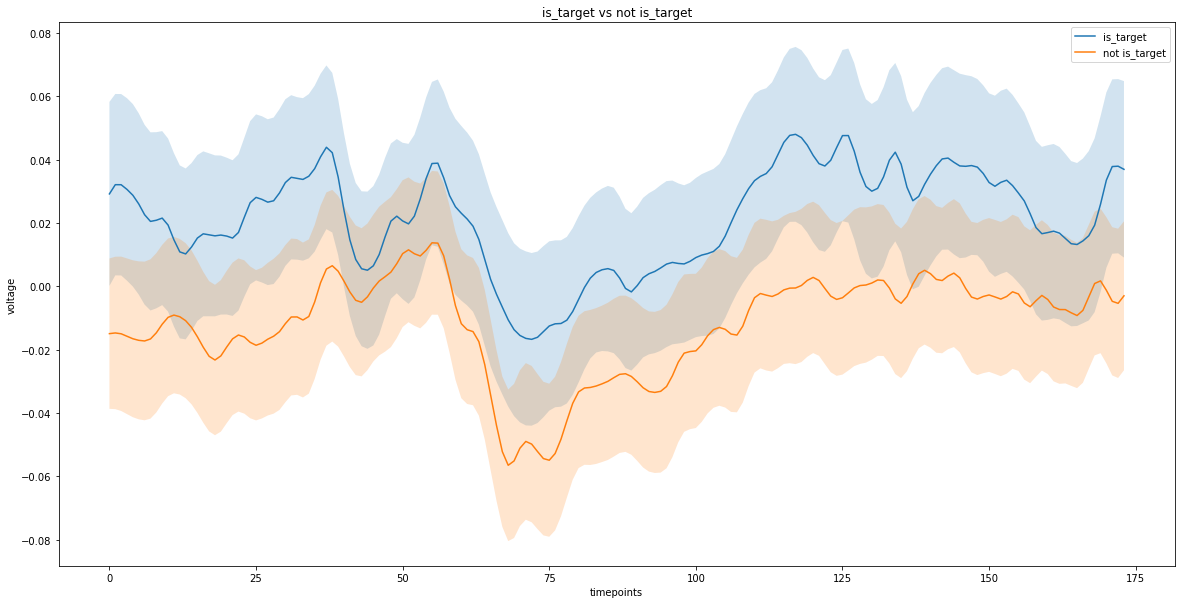

In [14]:
# Compare ERPs
plt.figure(figsize=(20,10))

# eeg_list = tidyEEGList(getEEGFromDataFrame_AvgLeftRight(df, data_type=data_type))
# av=np.mean(eeg_list, axis=0)
# sem=getSEM(eeg_list)
# plt.plot(av, label="all")
# plt.fill_between(list(range(len(av))), av-sem, av+sem, alpha = 0.2)


feature_name = 'is_target'
eeg_list_1 = tidyEEGList(getEEGFromDataFrame_AvgLeftRight(df[df[feature_name]==True], data_type=data_type))
print("num in first list:", len(eeg_list_1))
av1=np.mean(eeg_list_1, axis=0)
sem1=getSEM(eeg_list_1)
plt.plot(av1, label=feature_name)
plt.fill_between(list(range(len(av1))), av1-sem1, av1+sem1, alpha = 0.2)

eeg_list_not_1 = tidyEEGList(getEEGFromDataFrame_AvgLeftRight(df[df[feature_name]==False], data_type=data_type))
av2=np.mean(eeg_list_not_1, axis=0)
sem2=getSEM(eeg_list_not_1)
print("num in second list:", len(eeg_list_not_1))
plt.plot(av2, label="not " + feature_name)
plt.fill_between(list(range(len(av2))), av2-sem2, av2+sem2, alpha = 0.2)


plt.title(feature_name + " vs not " + feature_name)
plt.xlabel("timepoints")
plt.ylabel("voltage")
plt.legend()
plt.show()